In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(directory="C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_train\\seg_train",target_size=(50,50),shuffle=True)
test_dataset =  test.flow_from_directory(directory="C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_test\\seg_test",target_size=(50,50),shuffle=True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Giving Path to training,testing data set

In [3]:
#train_dataset=train.flow_from-directory('C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_train',target_size=(50,50),shuffle=True)
#test_dataset=train.flow_from-directory('C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_test',target_size=(50,50),shuffle=True)

In [4]:
# Before
#train_generator = train_datagen.flow_from(directory=train_dir, target_size=(224, 224), batch_size=32)

# After
#train_dataset = train.flow_from_directory(directory="C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_train\\seg_train",target_size=(50,50),shuffle=True)
#test_dataset =  test.flow_from_directory(directory="C:\\Users\\Sanjay Bhargav\\OneDrive\\Desktop\\seg_test\\seg_test",target_size=(50,50),shuffle=True)

#reshaped_data = np.reshape(train_dataset, (150, 150, 3))

## VISUALIZATION

[4, 21, 15, 25, 9, 22, 6, 10, 7, 16]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


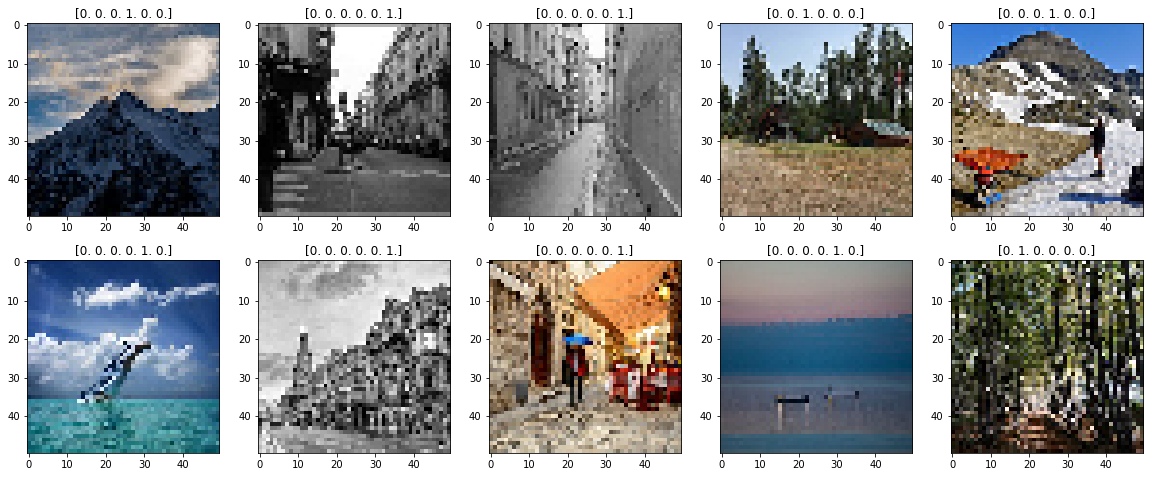

In [5]:
indices=[np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()

## mapping for the classification and explicit convertion

In [6]:
#explicit casting
"""values=list(train_dataset.class_indices.values())
keys=list(train_dataset.class_indices.keys())

dics=list(map(lambda x,y:{x,y},values,keys))
print(dics)

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)

mapping = reduce(lambda x, y: {**x, **y}, dics)

print(mappings)
#print(values)
#print(keys)
#print(dics)"""

'values=list(train_dataset.class_indices.values())\nkeys=list(train_dataset.class_indices.keys())\n\ndics=list(map(lambda x,y:{x,y},values,keys))\nprint(dics)\n\nfrom functools import reduce\nmappings = reduce(lambda x,y:{**x,**y},dics)\n\nmapping = reduce(lambda x, y: {**x, **y}, dics)\n\nprint(mappings)\n#print(values)\n#print(keys)\n#print(dics)'

In [7]:
values = list(train_dataset.class_indices.values())
keys = list(train_dataset.class_indices.keys())

dics = list(map(lambda x, y: {x: y}, keys, values))
print(dics)

from functools import reduce
mapping = reduce(lambda x, y: {**x, **y}, dics)
mapping
#print(values)
#print(keys)
#print(dics)

[{'buildings': 0}, {'forest': 1}, {'glacier': 2}, {'mountain': 3}, {'sea': 4}, {'street': 5}]


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## model initialization

In [8]:
model=Sequential()
#developing neural network
#1layers ie.e. convolation,activation
model.add(Conv2D(filters=32,kernel_size=(3, 3),padding='same',input_shape= (50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




#2layers ie.e. convolation,activation
model.add(Conv2D(filters=50,kernel_size=(3, 3),padding='same',input_shape= (50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




#3layers ie.e. convolation,activation
model.add(Conv2D(filters=75,kernel_size=(3, 3),padding='same',input_shape= (50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Flatten())
kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [9]:
"""model=Sequential()
# 1st layer, i.e. convolution and activation
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd layer, i.e. convolution and activation
model.add(Conv2D(filters=50, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd layer, i.e. convolution and activation
model.add(Conv2D(filters=75, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))


model.summary()
"""

"model=Sequential()\n# 1st layer, i.e. convolution and activation\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))\nmodel.add(Activation('relu'))\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3)))\nmodel.add(Dropout(0.25))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\n# 2nd layer, i.e. convolution and activation\nmodel.add(Conv2D(filters=50, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))\nmodel.add(Activation('relu'))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3)))\nmodel.add(Dropout(0.25))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\n# 3rd layer, i.e. convolution and activation\nmodel.add(Conv2D(filters=75, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 3)))\nmodel.add(Activation('relu'))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3)))\nmodel.add(Dropout(0.25))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Fl

## training model

In [10]:
model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics='accuracy')
history=model.fit(train_dataset,batch_size=80,epochs=10,validation_data = test_dataset)

Epoch 1/10
439/439 [==============================] - 611s 1s/step - loss: 1.2051 - accuracy: 0.5152 - val_loss: 1.0727 - val_accuracy: 0.6073
Epoch 2/10
439/439 [==============================] - 216s 490ms/step - loss: 0.9248 - accuracy: 0.6408 - val_loss: 0.9513 - val_accuracy: 0.6513
Epoch 3/10
439/439 [==============================] - 142s 322ms/step - loss: 0.7871 - accuracy: 0.7081 - val_loss: 0.7886 - val_accuracy: 0.7237
Epoch 4/10
439/439 [==============================] - 142s 322ms/step - loss: 0.6957 - accuracy: 0.7517 - val_loss: 0.7594 - val_accuracy: 0.7507
Epoch 5/10
439/439 [==============================] - 127s 288ms/step - loss: 0.6267 - accuracy: 0.7843 - val_loss: 0.7437 - val_accuracy: 0.7597
Epoch 6/10
439/439 [==============================] - 115s 262ms/step - loss: 0.5691 - accuracy: 0.8046 - val_loss: 0.6249 - val_accuracy: 0.7833
Epoch 7/10
439/439 [==============================] - 110s 251ms/step - loss: 0.5308 - accuracy: 0.8196 - val_loss: 0.6089 - va

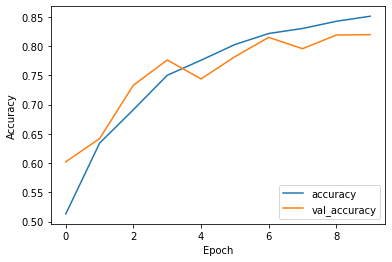

In [28]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')